# ML-WS22 Standalone Project with FFT data


# Import libraries

In [1]:
import os
import pathlib
import pandas as pd
import glob
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

os.path.abspath(os.getcwd())

'F:\\ML_FIUS_Sonar_Sensor_Project'

# Convert data file to Excel

In [2]:
# Text file data directories
human_data = "F:\ML_FIUS_Sonar_Sensor_Project\Data_fft\Human_FFT"
emptyseat_data = "F:\ML_FIUS_Sonar_Sensor_Project\Data_fft\Emptyseat_FFT"

# Excel files saving directoriey
output_path = "F:\ML_FIUS_Sonar_Sensor_Project\Data_fft\Output_FFT"

#For Human Data
for file in os.listdir(human_data):
    if file.endswith('.txt'):
        # Take all human text file into dataframe dropping header row.  
        df = pd.read_csv(os.path.join(human_data, file), delimiter='\t', skiprows=1)
         # Save excel file in the output directory tag human in the beginning
        output_file = os.path.join(output_path, 'human_' + os.path.splitext(file)[0] + '.xlsx')
        df.to_excel(output_file, header=False, index=False)

#For empty Seat Data   
for file in os.listdir(emptyseat_data):
    if file.endswith('.txt'):
        # Take all empty text file into dataframe dropping header row.
        df = pd.read_csv(os.path.join(emptyseat_data, file), delimiter='\t', skiprows=1)
        # Save excel file in the output directory with tag emptyseat in the beginning
        output_file = os.path.join(output_path, 'emptyseat_' + os.path.splitext(file)[0] + '.xlsx')
        df.to_excel(output_file, header=False, index=False)



# Marge Data

In [17]:
# Directory where your files are located
#output_path = "F:\ML_FIUS_Sonar_Sensor_Project\Output_FFT"

# take to empty data frame
human_dfs = []
emptyseat_dfs = []


for filename in os.listdir(output_path):
    if filename.startswith('human_') and filename.endswith('.xlsx'):
        # Read the Excel file into a dataframe
        human_df = pd.read_excel(os.path.join(output_path, filename), header=None)
       #drop the column value with '0'
        human_df = human_df.loc[:, (human_df != 0).any(axis=0)]
        # Label human data with value 1
        human_df.insert(0, 'new_column', 1)
        human_dfs.append(human_df)
        
    elif filename.startswith('emptyseat_') and filename.endswith('.xlsx'):
        # Read the Excel file into a dataframe
        emptyseat_df = pd.read_excel(os.path.join(output_path, filename), header=None)
        #drop the column value with '0'
        emptyseat_df = emptyseat_df.loc[:, (emptyseat_df != 0).any(axis=0)]
        # Label human data with value 0
        emptyseat_df.insert(0, 'new_column', 0)
        emptyseat_dfs.append(emptyseat_df)

# marge all human dataframes into a single dataframe
human_merged = pd.concat(human_dfs, ignore_index=True)
# marge all emptyseat dataframes into a single dataframe
emptyseat_merged = pd.concat(emptyseat_dfs, ignore_index=True)

# Marge both data frame into one dataframe
merged = pd.concat([human_merged, emptyseat_merged], ignore_index=True)
#Drop unnecessary column 
merged = merged.drop(merged.columns[1:11], axis=1)
# save the dataframe to a  Excel file
merged.to_excel(os.path.join(output_path, 'fft_merged.xlsx'), header=False, index=False)

In [18]:
#Count labeled data
os.chdir(output_path)
data = pd.read_excel("fft_merged.xlsx")
Counter(data.iloc[:,0])

Counter({1: 34741, 0: 10829})

In [19]:
X = data.iloc[1:,1:]
Y = data.iloc[1:,0]
X.head()
Y.head()

1    1
2    1
3    1
4    1
5    1
Name: 1, dtype: int64

## Split Data for training and Testing

In [20]:
input_var = X
print(input_var.shape)
X_train, X_test, y_train, y_test = train_test_split(input_var, Y, test_size=0.3,random_state=101)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

(45569, 85)


C:\Users\Mahbub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Mahbub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Mahbub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,1.401784,1.321174,1.210773,1.005367,1.182250,1.120423,1.064314,0.671512,0.640060,0.365530,...,0.969863,0.864493,1.035611,1.003044,0.966265,0.924721,0.858130,0.874512,0.749022,0.525981
1,-0.451619,-0.706488,-0.479068,-0.562735,-0.620538,-0.510838,-0.720089,-0.452499,-0.653600,-0.480896,...,-0.453863,-0.631267,-0.419064,-0.527255,-0.542966,-0.496477,-0.659218,-0.552889,-0.641911,-0.614522
2,4.596466,4.797168,4.988541,5.154807,5.372516,5.416613,5.513100,5.542228,5.519944,5.468737,...,3.506387,3.656578,3.819558,3.937520,4.001780,4.013911,4.040226,3.823901,3.802078,3.558683
3,-0.419103,-0.682349,-0.470943,-0.627068,-0.482487,-0.446233,-0.679349,-0.460645,-0.620849,-0.464460,...,-0.658422,-0.290566,-0.594628,-0.594521,-0.389485,-0.590089,-0.581183,-0.621679,-0.466951,-0.631802
4,1.588750,1.546470,1.365133,1.174239,1.247216,1.185027,0.942095,0.679657,0.738313,0.661368,...,0.798034,0.656749,0.726283,0.397651,0.156226,0.048174,-0.008926,-0.243332,-0.536935,-0.666363


# Train Support vector machines (SVMs) model to identify human & empty_seat

In [22]:
svm = SVC(C=0.1, kernel='rbf', gamma='scale', random_state=101)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9839075415112282


[[10344    41]
 [  179  3107]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3286
           1       0.98      1.00      0.99     10385

    accuracy                           0.98     13671
   macro avg       0.98      0.97      0.98     13671
weighted avg       0.98      0.98      0.98     13671

3107 179 41 10344


array([[10344,    41],
       [  179,  3107]], dtype=int64)

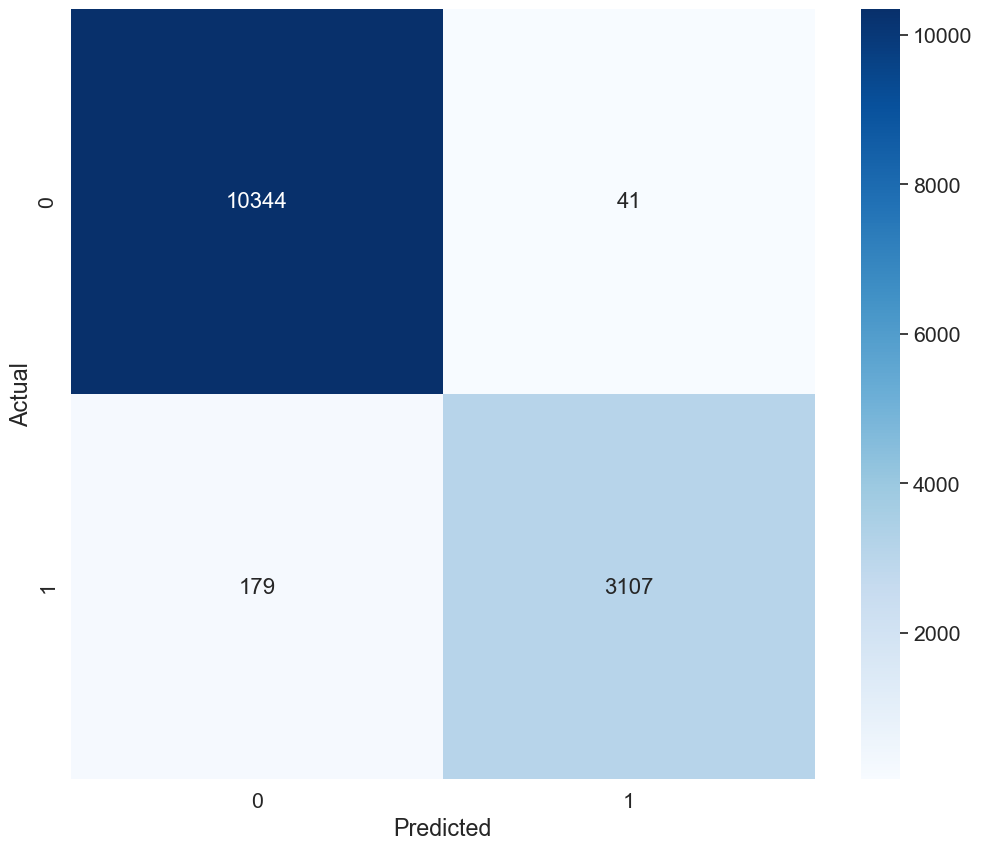

In [23]:
#Generate Confution matrix & calculate other values
def confusion_matrix_binary_svm(y_test, y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[1,0]) 
    print(cnf_matrix)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred).ravel()
    print(TN, FP, FN, TP)
    df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index=np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize=(12,10))
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g') # font size
    return cnf_matrix

y_pred_svm = svm.predict(X_test)
confusion_matrix_binary_svm(y_test, y_pred_svm)


# Train Random Forest classifier

In [24]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, max_features='sqrt', random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.934606100504718


[[10358    27]
 [  867  2419]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      3286
           1       0.92      1.00      0.96     10385

    accuracy                           0.93     13671
   macro avg       0.96      0.87      0.90     13671
weighted avg       0.94      0.93      0.93     13671

2419 867 27 10358


array([[10358,    27],
       [  867,  2419]], dtype=int64)

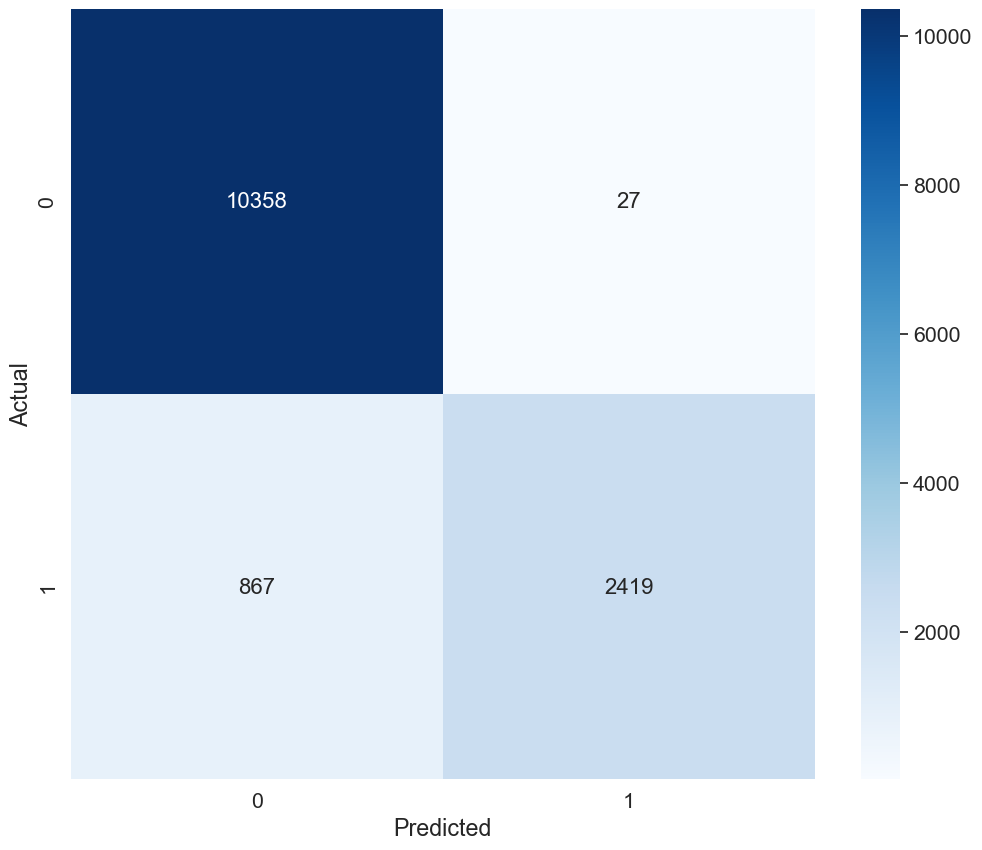

In [25]:
#Generate Confution matrix & calculate other values
def confusion_matrix_binary_rfc(y_test, y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[1,0]) 
    print(cnf_matrix)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred).ravel()
    print(TN, FP, FN, TP)
    df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index=np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize=(12,10))
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g') # font size
    return cnf_matrix

y_pred_rfc = rfc.predict(X_test)
confusion_matrix_binary_rfc(y_test, y_pred)

# Train K-Nearest Neighbors classifier

In [26]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\Mahbub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9823714432009363


C:\Users\Mahbub\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[10146   239]
 [    2  3284]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3286
           1       1.00      0.98      0.99     10385

    accuracy                           0.98     13671
   macro avg       0.97      0.99      0.98     13671
weighted avg       0.98      0.98      0.98     13671

3284 2 239 10146


array([[10146,   239],
       [    2,  3284]], dtype=int64)

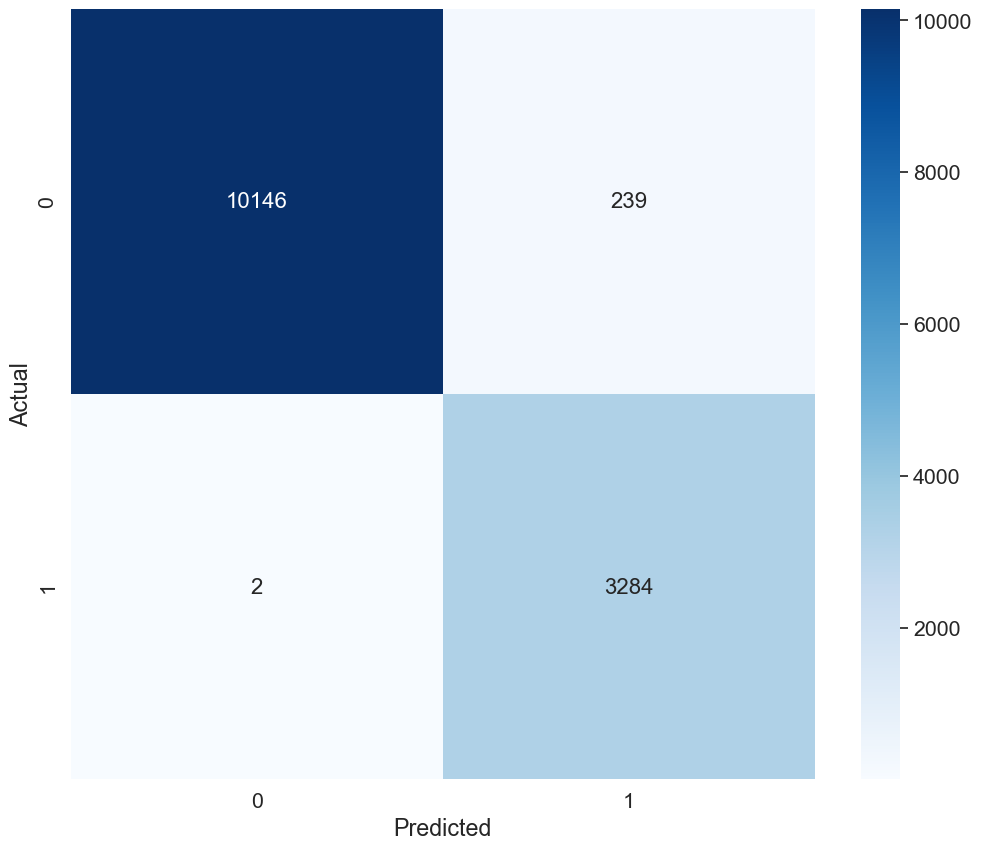

In [27]:
#Generate Confution matrix & calculate other values
def confusion_matrix_binary_knn(y_test, y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[1,0]) 
    print(cnf_matrix)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred).ravel()
    print(TN, FP, FN, TP)
    df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index=np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize=(12,10))
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g') # font size
    return cnf_matrix

y_pred_knn = knn.predict(X_test)
confusion_matrix_binary_knn(y_test, y_pred)